#Clone repository from Github


In [1]:
username = 'kirillfr97'
repository = 'yolov8'
git_token = ''

In [ ]:
!git clone https://{git_token}@github.com/{username}/{repository}.git

#Prepare

In [2]:
import os

# Directory to store data on local machine
HOME = os.getcwd()
print(f'{HOME = }')

HOME = '/content'


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
%cd /content/drive/MyDrive/Github/

/content/drive/MyDrive/Github


In [5]:
%cd {repository}

# Github directory
REPO = os.getcwd()
print(f'{REPO = }')

/content/drive/MyDrive/Github/yolov8
REPO = '/content/drive/MyDrive/Github/yolov8'


#Install YOLOv8

In [6]:
!pip install ultralytics

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.165 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.3/78.2 GB disk)


In [7]:
from ultralytics import YOLO
from IPython.display import Image

%cd {REPO}

# Load a pretrained YOLO model
model_n = YOLO('yolov8n.pt')
model_s = YOLO('yolov8s.pt')

/content/drive/MyDrive/Github/yolov8


#Preparing a custom dataset

In [8]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet

from roboflow import Roboflow
rf = Roboflow(api_key="oJL5Y3VT8xD8F5c182SB")
project = rf.workspace("rev-tvsjf").project("cow-lie-stand-walk")
dataset = project.version(2).download("yolov8")

/content/datasets
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.3/59.3 kB 6.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 6.3 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.134 is required but found version=8.0.165, to fix: `pip install ultralytics==8.0.134`


Extracting Dataset Version Zip to Cow-Lie-Stand-Walk-2 in yolov8:: 100%|██████████| 9876/9876 [00:03<00:00, 2490.62it/s]


In [9]:
# Update data.yaml from repo
!cp -r {REPO}/data.yaml {dataset.location}

#Training

In [10]:
print(f'{dataset.location}/data.yaml')

/content/datasets/Cow-Lie-Stand-Walk-2/data.yaml


In [11]:
epoch = 50
batch = 16

In [12]:
%cd {HOME}

# Train with smallest pretrained model
results = model_n.train(
    data=f'{dataset.location}/data.yaml',
    epochs=epoch,
    batch=batch
  )

/content


Ultralytics YOLOv8.0.165 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/datasets/Cow-Lie-Stand-Walk-2/data.yaml, epochs=50, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscri

In [17]:
import locale

locale.getpreferredencoding = lambda: "UTF-8"

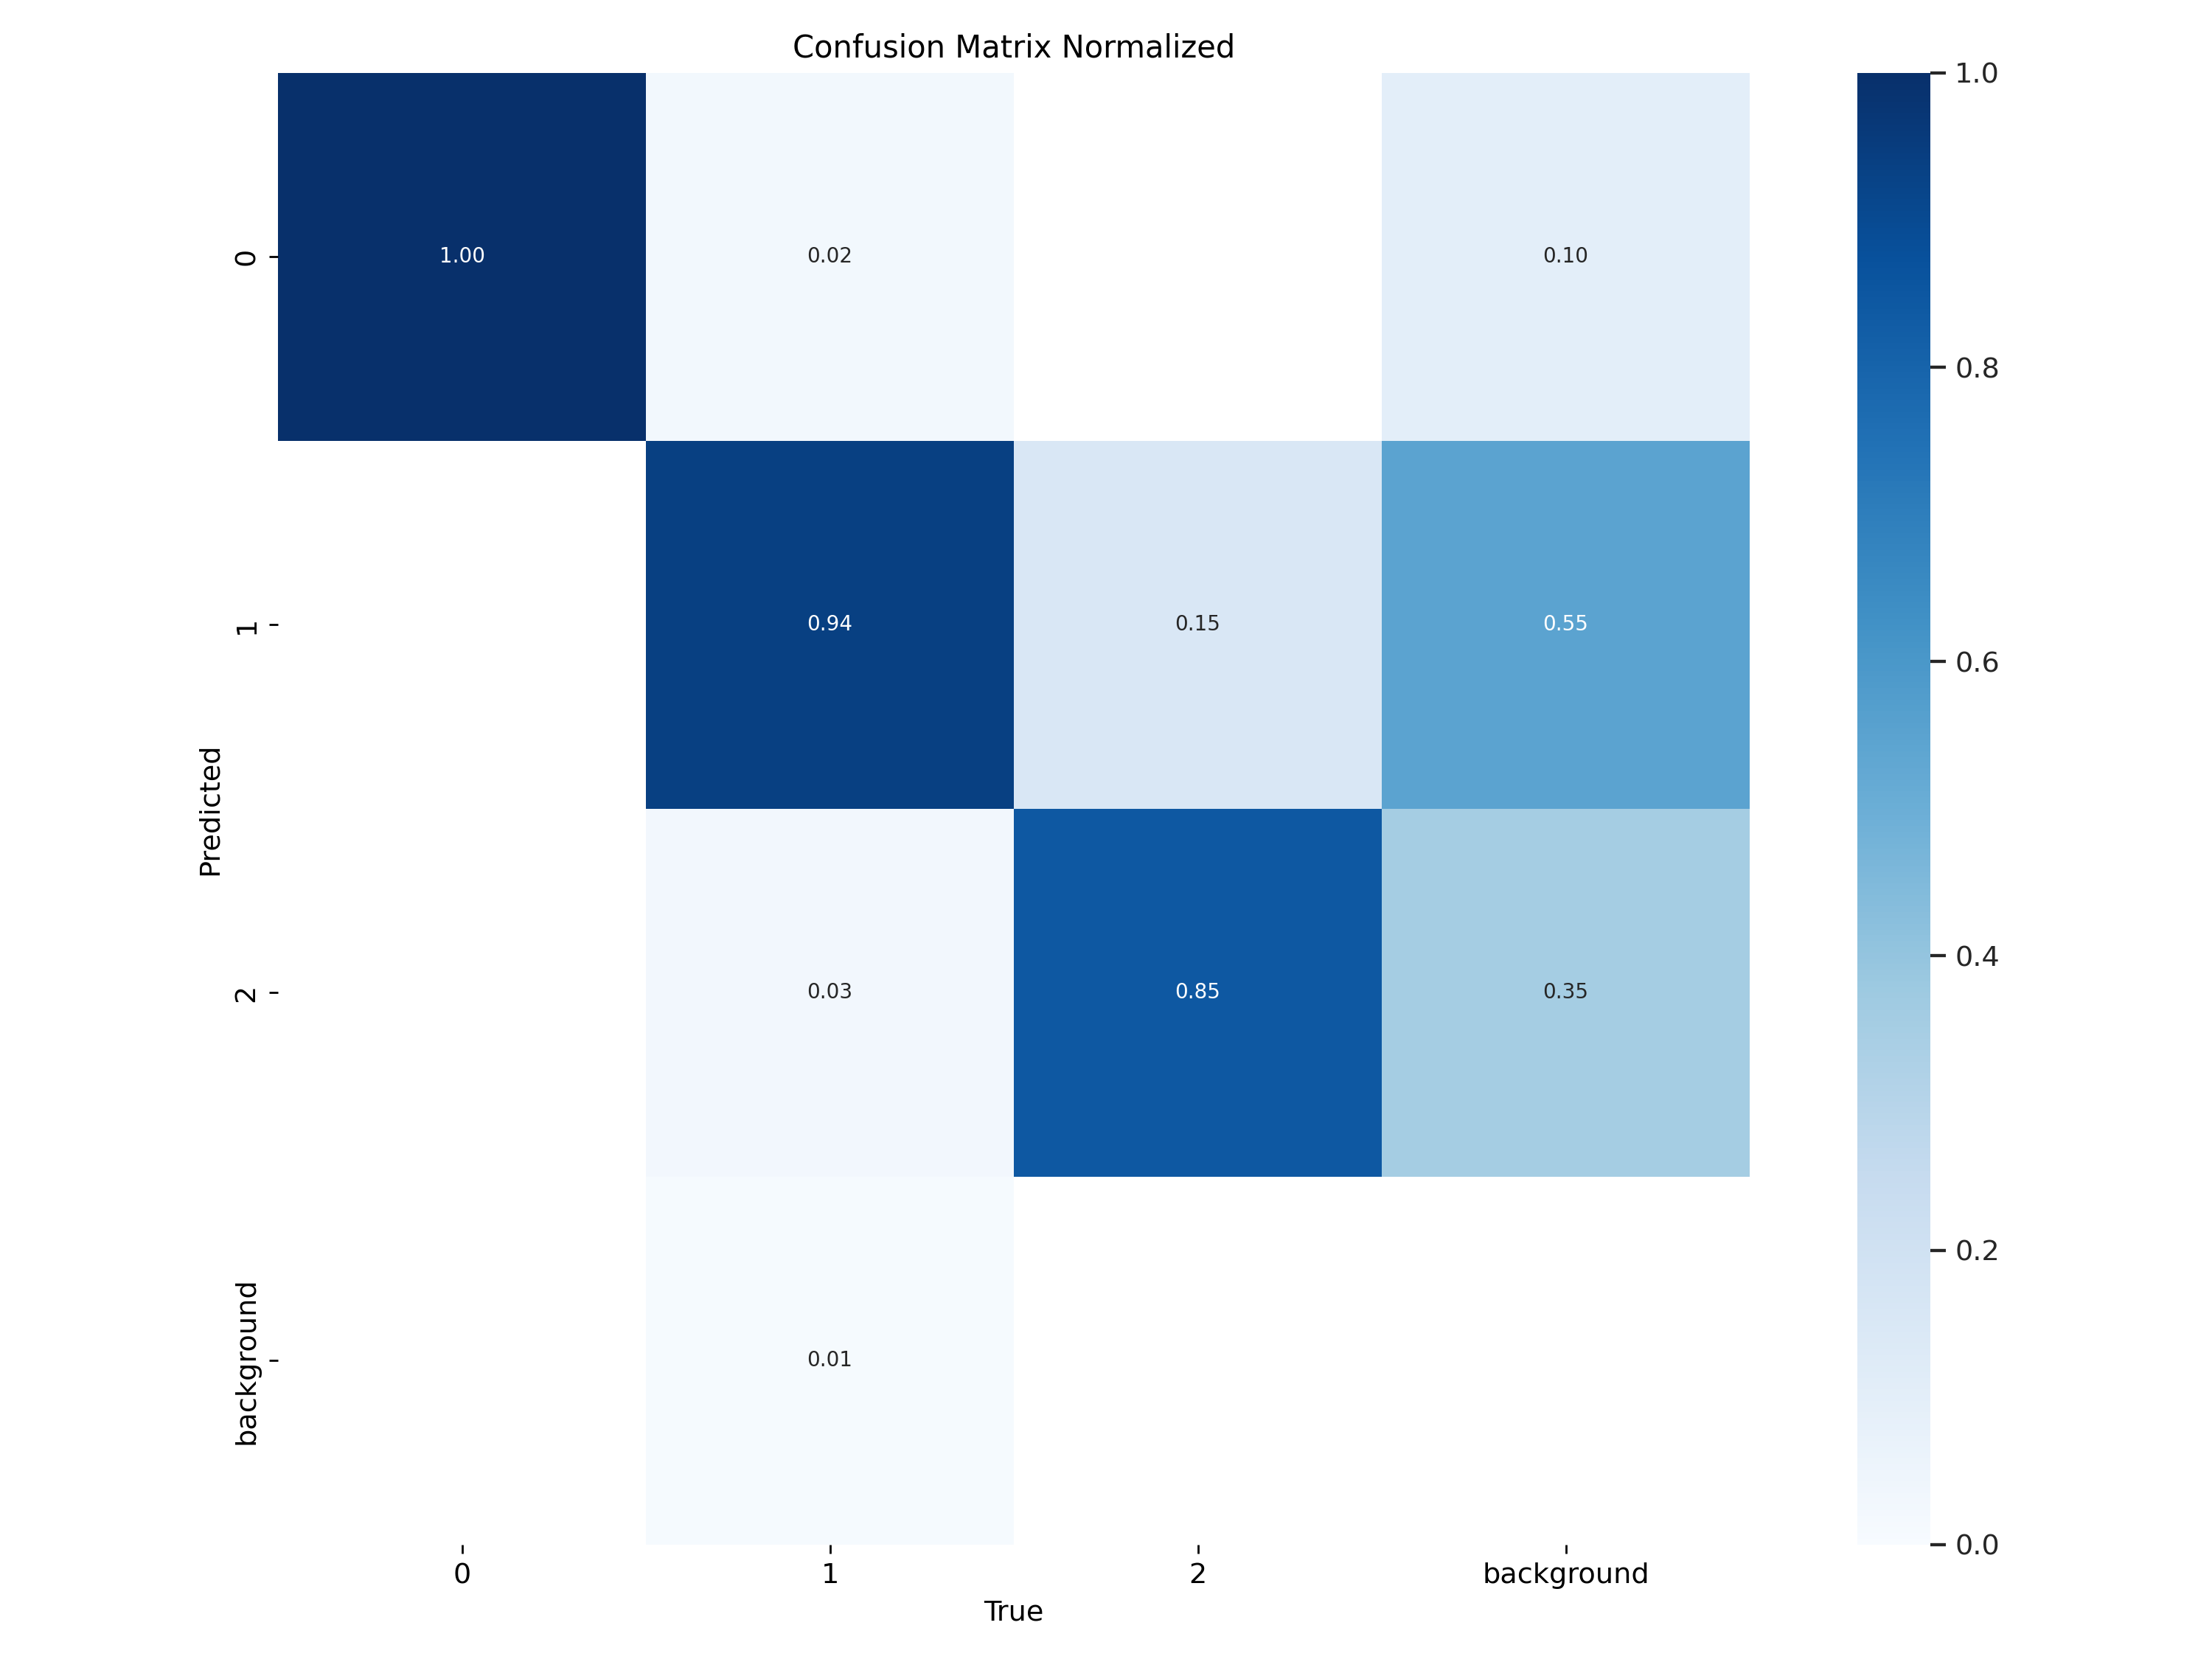

In [21]:
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix_normalized.png', width=600)

In [ ]:
!cp {HOME}/runs/detect/train/confusion_matrix_normalized.png {REPO}

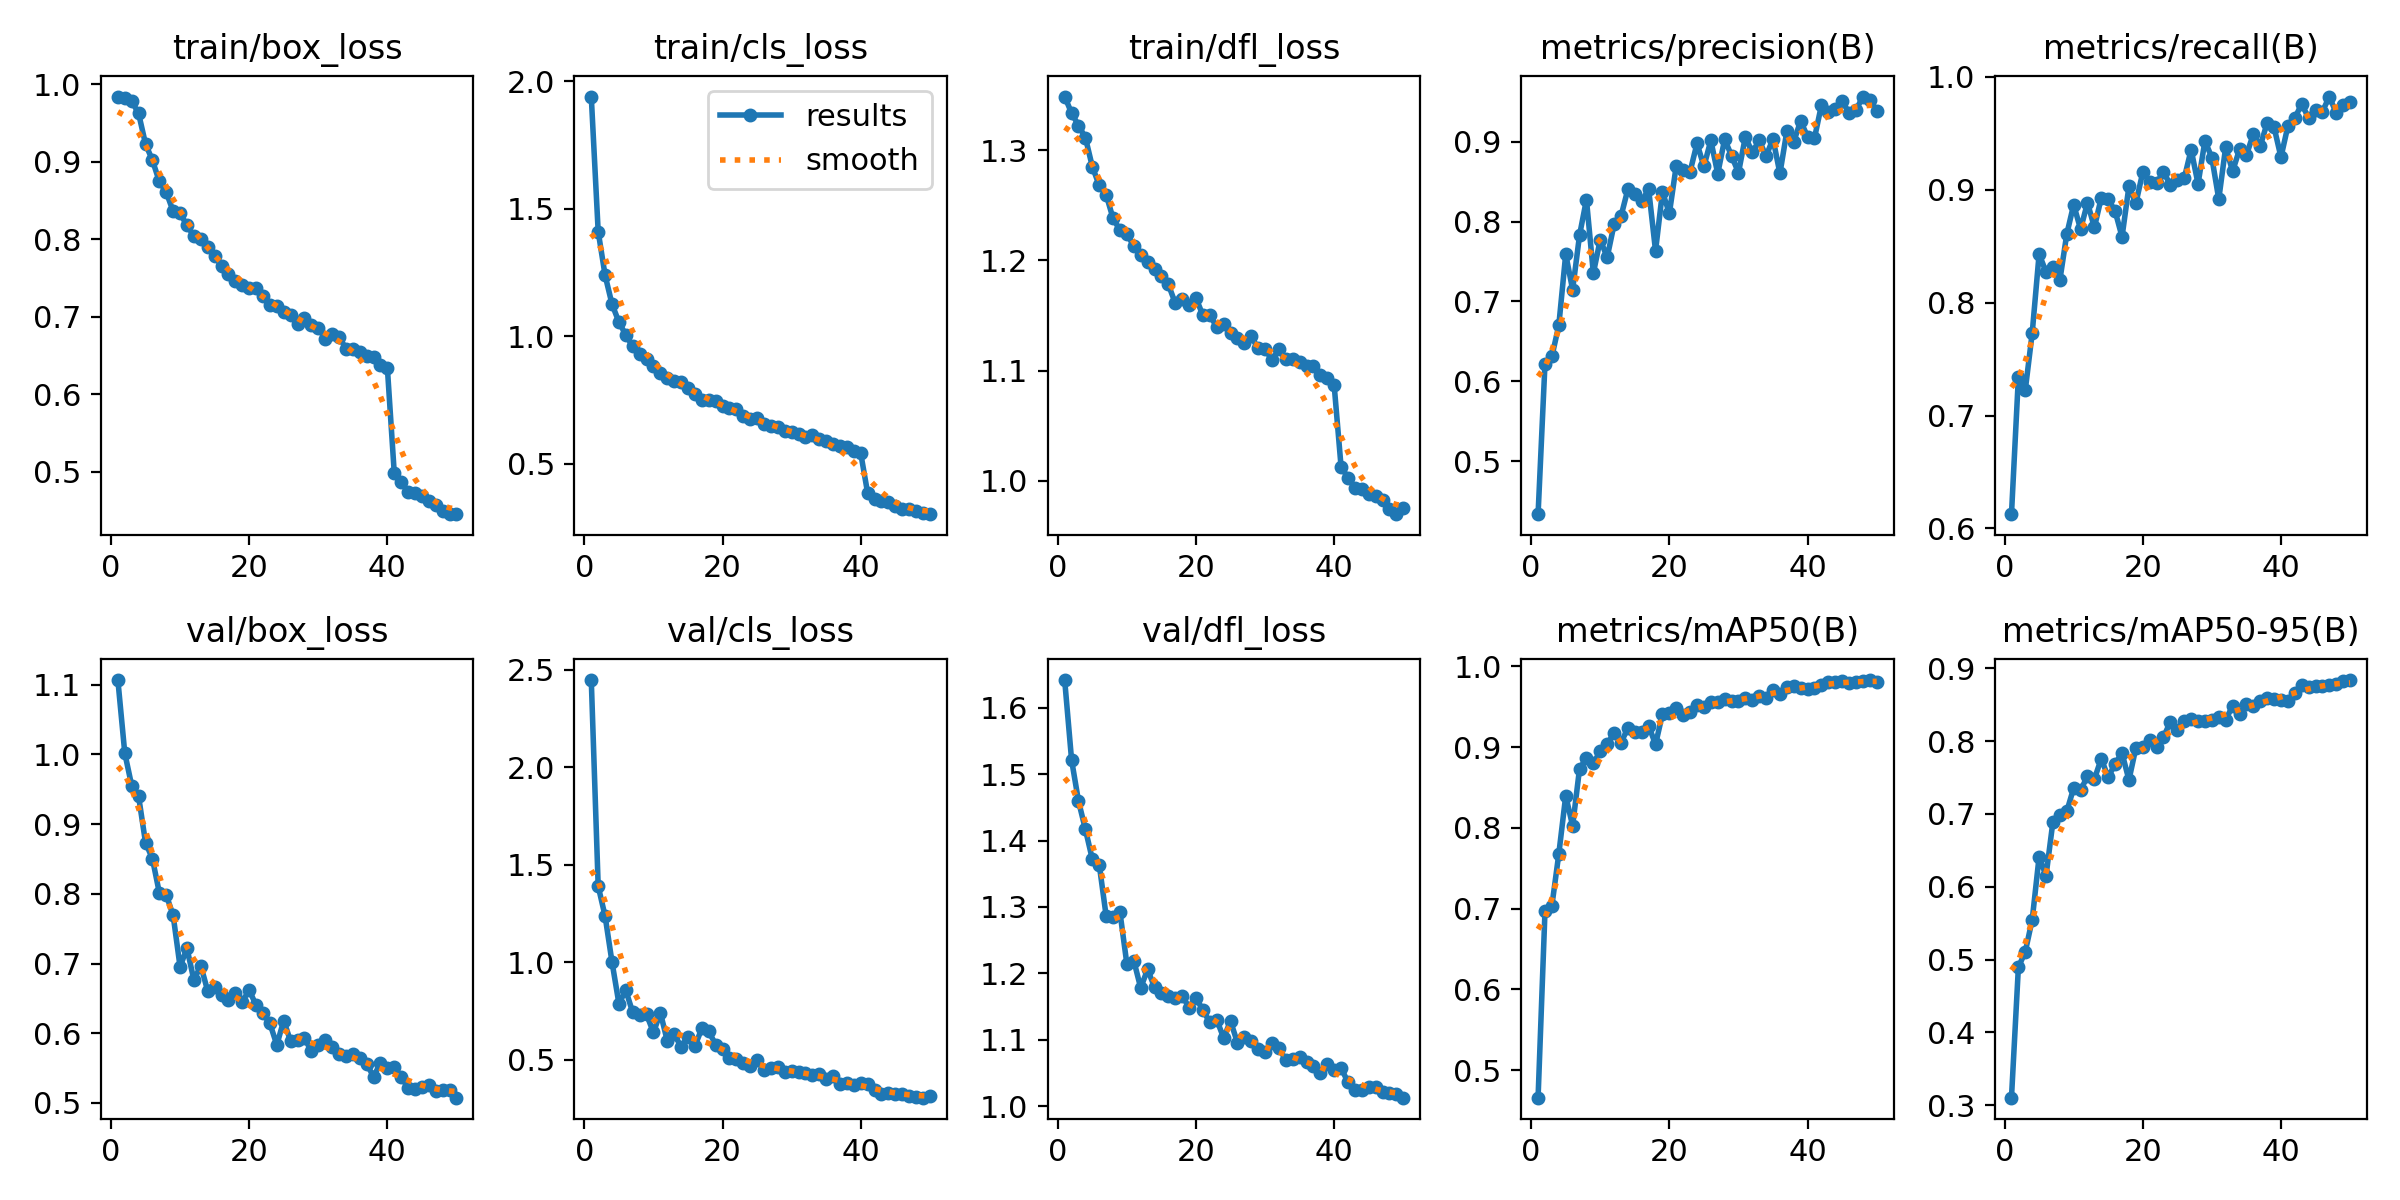

In [22]:
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

In [ ]:
!cp {HOME}/runs/detect/train/results.png {REPO}

#Save weights

In [20]:
!cp {HOME}/runs/detect/train/weights/best.pt {REPO}/weights

In [ ]:
!rm -r {HOME}/runs/detect/train/

#Predict Custom Model

In [23]:
%cd {HOME}

# Load best model
best_model = YOLO(f'{HOME}/runs/detect/train/weights/best.pt')
# Predict on test data
predict = best_model.predict(
    source=f'{dataset.location}/test/images',
    conf=0.25,
    save=True,
    save_txt=True)

/content



image 1/493 /content/datasets/Cow-Lie-Stand-Walk-2/test/images/lie106_jpg.rf.9c6a47469931602e32e72c2b7061e158.jpg: 640x640 1 0, 26.2ms
image 2/493 /content/datasets/Cow-Lie-Stand-Walk-2/test/images/lie109_jpg.rf.d761902a1eedae6da8722ce25edb7a8a.jpg: 640x640 1 0, 9.1ms
image 3/493 /content/datasets/Cow-Lie-Stand-Walk-2/test/images/lie10_jpg.rf.259639d682fa2527e45525a25ae57a1f.jpg: 640x640 1 0, 7.3ms
image 4/493 /content/datasets/Cow-Lie-Stand-Walk-2/test/images/lie10_jpg.rf.7c0f4841e630464d3a4f6f63302d0879.jpg: 640x640 1 0, 7.3ms
image 5/493 /content/datasets/Cow-Lie-Stand-Walk-2/test/images/lie10_jpg.rf.f05e2615e3fc30426068bbebd15efc0c.jpg: 640x640 1 0, 7.3ms
image 6/493 /content/datasets/Cow-Lie-Stand-Walk-2/test/images/lie11_jpg.rf.680ad8a206c40df76990d34f2d83b332.jpg: 640x640 1 0, 7.3ms
image 7/493 /content/datasets/Cow-Lie-Stand-Walk-2/test/images/lie124_jpg.rf.fec518bc4c94706fe7d155516bf9e39b.jpg: 640x640 3 0s, 1 1, 7.3ms
image 8/493 /content/datasets/Cow-Lie-Stand-Walk-2/test/im

In [ ]:
!cp {HOME}/runs/detect/train/weights/best.pt {REPO}/weights